In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import os

In [4]:
data =pd.read_csv("/content/clean_data.csv")
data.head()

,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,0,0,1,0,1,1,-3,61,90,0
1,1,0,0,1,0,0,0,0,0,0,1,1,2,51,90,0
2,2,1,0,0,0,0,0,1,0,0,0,1,1,62,90,0
3,3,0,0,1,0,0,0,0,0,1,1,0,4,69,7,0
4,4,1,0,1,0,0,0,0,1,1,0,1,2,49,30,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      1453 non-null   int64
 1   yummy           1453 non-null   int64
 2   convenient      1453 non-null   int64
 3   spicy           1453 non-null   int64
 4   fattening       1453 non-null   int64
 5   greasy          1453 non-null   int64
 6   fast            1453 non-null   int64
 7   cheap           1453 non-null   int64
 8   tasty           1453 non-null   int64
 9   expensive       1453 non-null   int64
 10  healthy         1453 non-null   int64
 11  disgusting      1453 non-null   int64
 12  Like            1453 non-null   int64
 13  Age             1453 non-null   int64
 14  VisitFrequency  1453 non-null   int64
 15  Gender          1453 non-null   int64
dtypes: int64(16)
memory usage: 181.8 KB


In [6]:
print(pd.isnull(data).sum())

Unnamed: 0        0
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [7]:
data.describe()

,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,726.000000,0.447350,0.092223,0.906401,0.132829,0.473503,0.099794,0.401239,0.355816,0.642120,0.801101,0.757054,0.777013,44.604955,94.794907,0.457674
std,419.589283,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,127.740576,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000
25%,363.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,33.000000,7.000000,0.000000
50%,726.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,45.000000,30.000000,0.000000
75%,1089.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,57.000000,90.000000,1.000000
max,1452.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,365.000000,1.000000


In [8]:
data.corr()

,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
Unnamed: 0,1.000000,0.025644,-0.003232,0.052209,-0.005047,-0.026592,0.021465,0.002460,0.029214,0.019455,0.044238,-0.020710,-0.014480,-0.036447,0.003631,0.003626
yummy,0.025644,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.682827,0.281653,0.300971,0.062545
convenient,-0.003232,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.365767,0.070597,0.073065,0.041402
spicy,0.052209,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.009611,-0.146217,0.003370,-0.051015
fattening,-0.005047,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,0.160129,0.139254,-0.057985,0.059707
greasy,-0.026592,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,0.257657,0.233554,-0.080006,-0.021801
fast,0.021465,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.168519,0.020558,0.025817,0.049027
cheap,0.002460,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,-0.146461,-0.016958,0.038975,0.116050
tasty,0.029214,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.644867,0.194576,0.255813,0.044385
expensive,0.019455,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,0.139637,0.070851,-0.013825,-0.144113


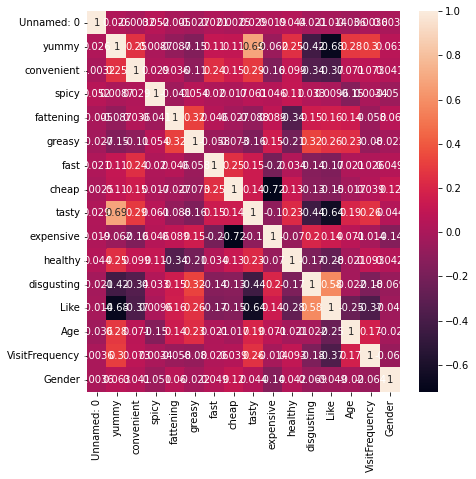

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


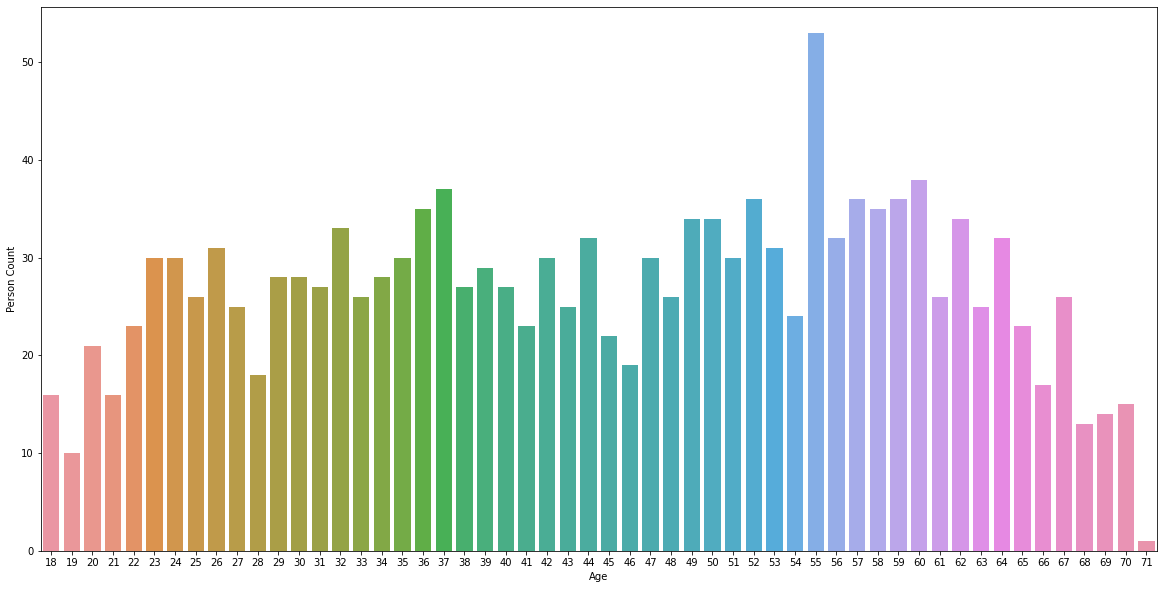

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      1453 non-null   int64
 1   yummy           1453 non-null   int64
 2   convenient      1453 non-null   int64
 3   spicy           1453 non-null   int64
 4   fattening       1453 non-null   int64
 5   greasy          1453 non-null   int64
 6   fast            1453 non-null   int64
 7   cheap           1453 non-null   int64
 8   tasty           1453 non-null   int64
 9   expensive       1453 non-null   int64
 10  healthy         1453 non-null   int64
 11  disgusting      1453 non-null   int64
 12  Like            1453 non-null   int64
 13  Age             1453 non-null   int64
 14  VisitFrequency  1453 non-null   int64
 15  Gender          1453 non-null   int64
dtypes: int64(16)
memory usage: 181.8 KB


In [13]:
data_bin = data.iloc[:, :11]
data_bin

,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy
0,0,1,0,1,0,1,0,0,1,0,1
1,1,0,0,1,0,0,0,0,0,0,1
2,2,1,0,0,0,0,0,1,0,0,0
3,3,0,0,1,0,0,0,0,0,1,1
4,4,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,1448,1,0,1,0,0,1,1,1,0,1
1449,1449,0,0,1,0,1,1,0,0,1,0
1450,1450,0,0,1,0,1,0,1,0,0,1
1451,1451,0,0,1,1,1,0,0,0,1,0


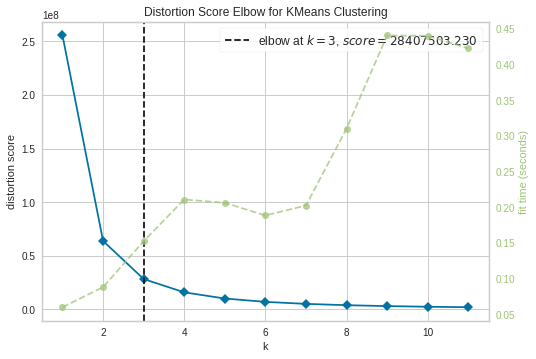

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

vis = KElbowVisualizer(kmeans, k=(1, 12)).fit(data_bin)
vis.show()

In [19]:
kmeans = KMeans(4, init='k-means++', random_state=42).fit(data_bin)
data['cluster_number'] = kmeans.labels_

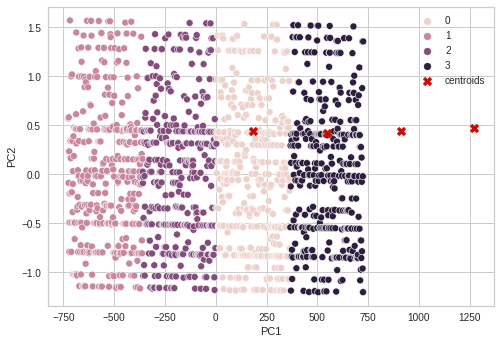

In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
x = data_bin.values
pca_data = preprocessing.scale(x)
pca = PCA(n_components=11)
pc = pca.fit_transform(x)

pf = pd.DataFrame(data=pc, columns=[f"PC{i+1}" for i in range(11)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()